In [1]:
import numpy as np
from sif.kernels import SquaredExponentialKernel
from sif.samplers import multivariate_normal_sampler
from sif.models import GaussianProcess

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n = 100
X_pred = np.atleast_2d(np.linspace(0, 1, n)).T
kernel = SquaredExponentialKernel(0.1)
C = kernel.cov(X_pred) + np.eye(n) * 1e-5

In [4]:
n_samples = 500
prior_samples = multivariate_normal_sampler(np.zeros((C.shape[0], )), C, n_samples)

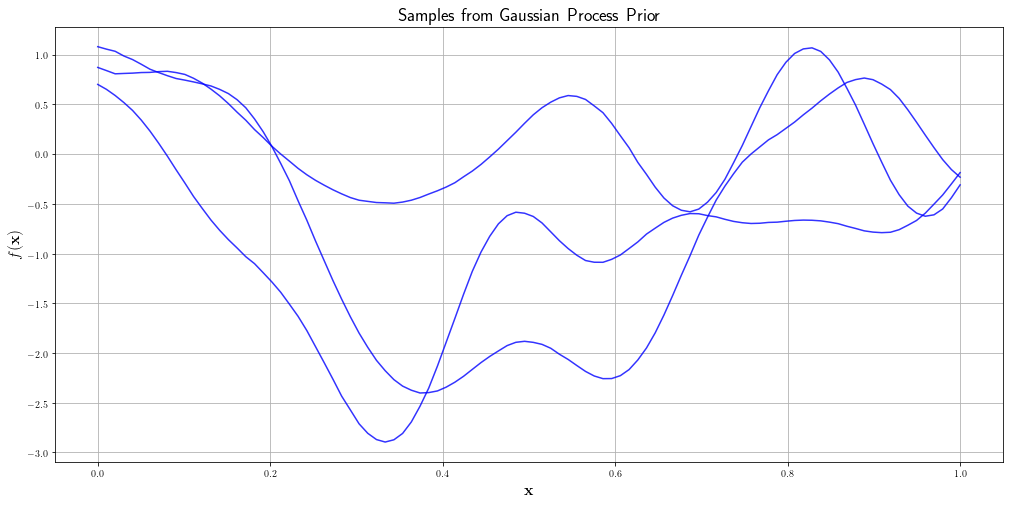

In [5]:
plt.figure(figsize=(17, 8))
for i in range(3):
    plt.plot(X_pred.ravel(), prior_samples[i], "b-", alpha=0.8)
plt.grid()
plt.xlabel("$\mathbf{x}$", fontsize=16)
plt.ylabel("$f(\mathbf{x})$", fontsize=16)
plt.title("Samples from Gaussian Process Prior", fontsize=18)
plt.show()

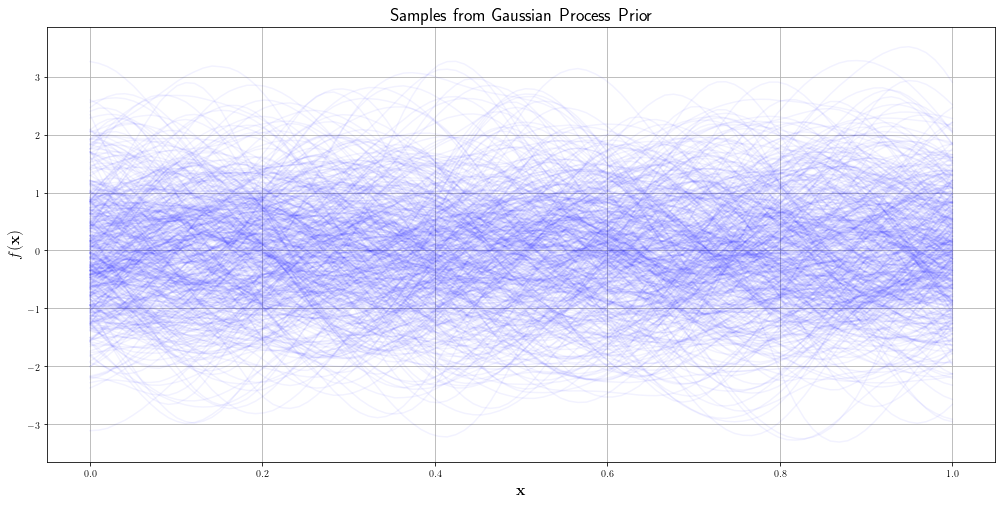

In [6]:
plt.figure(figsize=(17, 8))
for i in range(n_samples):
    plt.plot(X_pred.ravel(), prior_samples[i], "b-", alpha=0.05)
plt.grid()
plt.xlabel("$\mathbf{x}$", fontsize=16)
plt.ylabel("$f(\mathbf{x})$", fontsize=16)
plt.title("Samples from Gaussian Process Prior", fontsize=18)
plt.show()

In [7]:
X = np.array([[0.1], [0.5], [0.8]])
y = np.array([3, -5, 9])

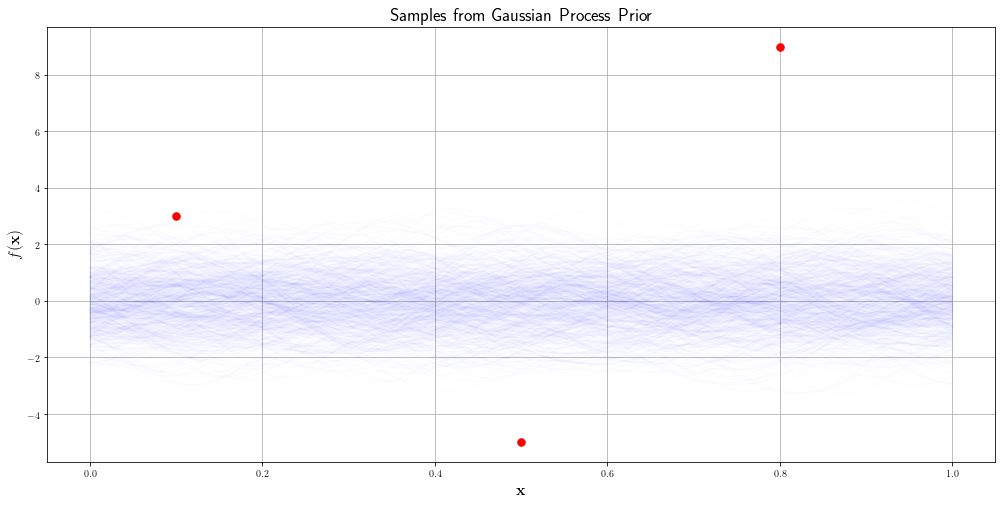

In [8]:
plt.figure(figsize=(17, 8))
for i in range(n_samples):
    plt.plot(X_pred.ravel(), prior_samples[i], "b-", alpha=0.01)
plt.plot(X.ravel(), y, "r.", markersize=15)
plt.grid()
plt.xlabel("$\mathbf{x}$", fontsize=16)
plt.ylabel("$f(\mathbf{x})$", fontsize=16)
plt.title("Samples from Gaussian Process Prior", fontsize=18)
plt.show()

In [9]:
gp = GaussianProcess(kernel, 1e-5)
gp.fit(X, y)

In [10]:
mean_pred, cov_pred = gp.predict(X_pred)
std_pred = np.sqrt(np.diag(cov_pred))
samples = gp.sample(X_pred, n_samples)

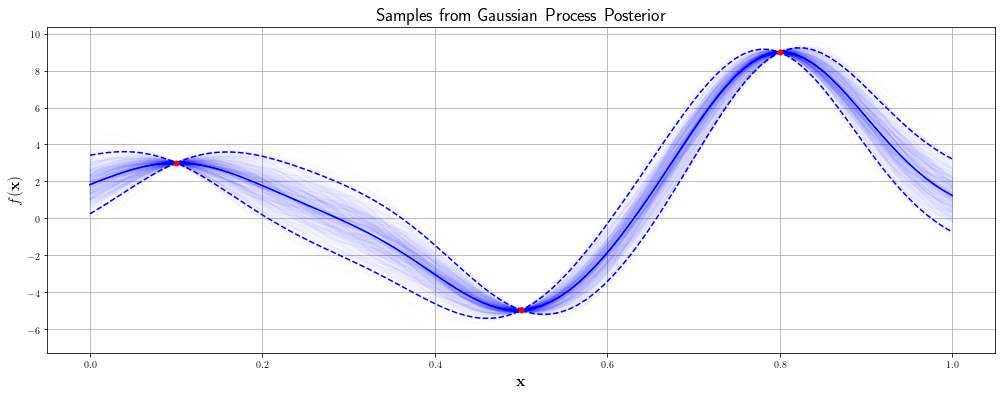

In [11]:
plt.figure(figsize=(17, 6))
plt.plot(X_pred.ravel(), mean_pred.ravel(), "b-")
plt.plot(X_pred.ravel(), mean_pred.ravel() + 2. * std_pred, "b--")
plt.plot(X_pred.ravel(), mean_pred.ravel() - 2. * std_pred, "b--")
for i in range(n_samples):
    plt.plot(X_pred.ravel(), samples[i], "b-", alpha=0.01)
plt.plot(X.ravel(), y.ravel(), "r.", markersize=10)
plt.grid()
plt.xlabel("$\mathbf{x}$", fontsize=16)
plt.ylabel("$f(\mathbf{x})$", fontsize=16)
plt.title("Samples from Gaussian Process Posterior", fontsize=18)
plt.show()

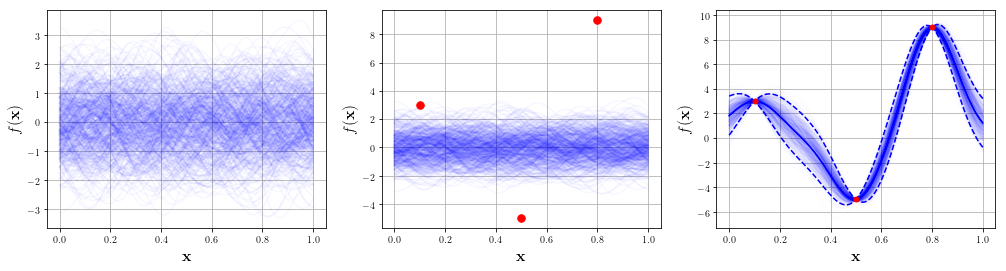

In [12]:
plt.figure(figsize=(17, 4))
plt.subplot(1, 3, 1)
for i in range(n_samples):
    plt.plot(X_pred.ravel(), prior_samples[i], "b-", alpha=0.03)
plt.grid()
plt.xlabel("$\mathbf{x}$", fontsize=16)
plt.ylabel("$f(\mathbf{x})$", fontsize=16)

plt.subplot(1, 3, 2)
for i in range(n_samples):
    plt.plot(X_pred.ravel(), prior_samples[i], "b-", alpha=0.03)
plt.plot(X.ravel(), y, "r.", markersize=15)
plt.grid()
plt.xlabel("$\mathbf{x}$", fontsize=16)
plt.ylabel("$f(\mathbf{x})$", fontsize=16)

plt.subplot(1, 3, 3)
plt.plot(X_pred.ravel(), mean_pred.ravel(), "b-")
plt.plot(X_pred.ravel(), mean_pred.ravel() + 2. * std_pred, "b--")
plt.plot(X_pred.ravel(), mean_pred.ravel() - 2. * std_pred, "b--")
for i in range(n_samples):
    plt.plot(X_pred.ravel(), samples[i], "b-", alpha=0.01)
plt.plot(X.ravel(), y.ravel(), "r.", markersize=10)
plt.grid()
plt.xlabel("$\mathbf{x}$", fontsize=16)
plt.ylabel("$f(\mathbf{x})$", fontsize=16)
plt.show()